# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [112]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import researchpy as rp
# import researchpy as rp  
# => rp.summary_cont(fifa['ValueNumeric'])
#ols
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [3]:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [37]:
fifa.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [5]:
fifa['ValueNumeric'] = fifa['Value'].str.extract('(\d+)')

In [6]:
fifa.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [32]:
fifa.dtypes

Name               object
Age                 int64
Nationality        object
Overall             int64
Potential           int64
Club               object
Value              object
Preferred Foot     object
Position           object
Weak Foot         float64
Acceleration      float64
SprintSpeed       float64
Stamina           float64
Strength          float64
LongShots         float64
Aggression        float64
Interceptions     float64
Positioning       float64
Vision            float64
Penalties         float64
ValueNumeric       object
dtype: object

In [35]:
fifa["ValueNumeric"]=pd.to_numeric(fifa["ValueNumeric"], errors='coerce')

In [8]:
#fifa['ValueNumeric2'] = fifa['Value'].str.replace('[.]', '000')

In [38]:
fifa['ValueNumeric'].dtypes

dtype('int64')

In [89]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

In [90]:
fifa = fifa.rename(columns={"Preferred Foot": "Preferred_Foot"})

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

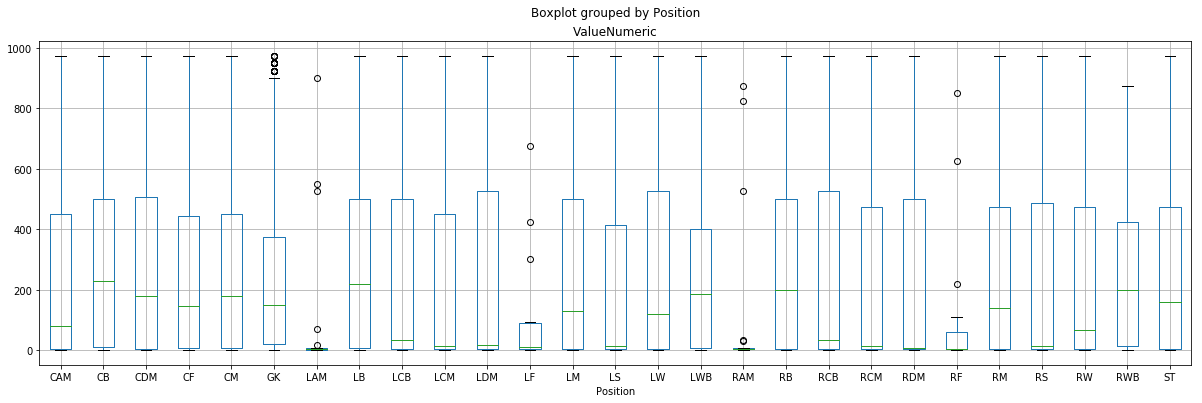

In [41]:
fifa.boxplot("ValueNumeric", by="Position", figsize=(20,6))

In [91]:
table=fifa.pivot_table(index="Position",columns="Preferred_Foot", values="ValueNumeric", aggfunc=np.sum)
table

Preferred_Foot,Left,Right
Position,,
CAM,60758,175811
CB,109512,408627
CDM,38172,234332
CF,6478,12735
CM,68361,301819
GK,46604,426644
LAM,107,1985
LB,341757,42874
LCB,71961,92055


In [62]:
fvalue, pvalue = stats.f_oneway(table['Left'], table['Right'])
print(fvalue, pvalue)

8.725301937356651 0.004703927440576636


In [71]:
w, pvalue = stats.levene(table['Left'], table['Right'])
print(w, pvalue)

7.441282670559635 0.008673017592822439


In [ ]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

In [83]:
rp.summary_cont(fifa['Age'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,18207.0,25.122206,4.669943,0.034609,25.054368,25.190043


In [84]:
rp.summary_cont(fifa['ValueNumeric']) 

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,ValueNumeric,18207.0,264.903279,289.676075,2.146809,260.695331,269.111227


What is your conclusion from this ANOVA?

In [ ]:
We'd like to determine whether a player's preffered foot and position have an impact on their value

The one-way ANOVA tests the null hypothesis that Left or Right groups have the same mean for the Salary (ValueNumeric). 
These groups have different size.

F-value=8.725301937356651; pvalue=0.004703927440576636

pvalue is less than 0% for the F-value of 8.72 - which is situated on the rejection area.
ANOVA Hypotheses

    Null hypotheses: Groups means are equal (no variation in means of groups)
    Alternative hypotheses: At least, one group mean is different from other groups


In [ ]:
We'd like to determine whether a player's preffered foot and position have an impact on their value.
Using the statsmodels library, we are able to produce an ANOVA table without munging our data. 
Create an ANOVA table with value as a function of position and preferred foot. 
Recall that pivoting is performed by the C function.


In [100]:
model = ols('ValueNumeric ~ C(Position) + C(Preferred_Foot)', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(Position),8.781574e+06,26.0,4.034803,2.119345e-11
C(Preferred_Foot),7.258024e+04,1.0,0.867045,3.517870e-01
Residual,1.516739e+09,18119.0,NaN,NaN


In [102]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.023
Date:                Fri, 13 Sep 2019   Prob (F-statistic):           1.04e-11
Time:                        20:37:23   Log-Likelihood:            -1.2858e+05
No. Observations:               18147   AIC:                         2.572e+05
Df Residuals:                   18119   BIC:                         2.574e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    250.9457     10.290     24.388      0.000     230.777     271.115
C(Position)[T.CB]             44.8886     11.604      3.868      0.000      22.143      67.634
C(Position)[T.CDM]            41.2451     13.278      3.106      0.002      15.219      67.271
C(Position)[T.CF]             12.8257     34.909      0.367      0.713     -55.599      81.250
C(Position)[T.CM]             19.0961     12.153      1.571      0.116      -4.725      42.918
C(Position)[T.GK]            -12.3332     11.387     -1.083      0.279     -34.653       9.986
C(Position)[T.LAM]          -148.2033     63.832     -2.322      0.020    -273.319     -23.088
C(Position)[T.LB]             40.6580     12.792      3.178      0.001      15.585      65.731
C(Position)[T.LCB]             5.4044     14.739      0.367      0.714     -23.485      34.294
C(Position)[T.LCM]           -14.4500     17.301     -0.835      0.404     -48.361      19.461
C(Position)[T.LDM]            15.4220     20.785      0.742      0.458     -25.318      56.162
C(Position)[T.LF]           -136.3731     75.287     -1.811      0.070    -283.944      11.197
C(Position)[T.LM]             19.9932     12.815      1.560      0.119      -5.126      45.113
C(Position)[T.LS]            -25.2063     22.185     -1.136      0.256     -68.691      18.278
C(Position)[T.LW]             16.5732     17.524      0.946      0.344     -17.776      50.923
C(Position)[T.LWB]             2.6003     34.236      0.076      0.939     -64.506      69.707
C(Position)[T.RAM]          -137.1081     63.832     -2.148      0.032    -262.224     -11.992
C(Position)[T.RB]             41.0758     12.429      3.305      0.001      16.713      65.438
C(Position)[T.RCB]            15.6260     14.679      1.064      0.287     -13.147      44.399
C(Position)[T.RCM]            -6.0710     17.389     -0.349      0.727     -40.155      28.013
C(Position)[T.RDM]           -14.6763     20.639     -0.711      0.477     -55.131      25.778
C(Position)[T.RF]           -129.4046     72.936     -1.774      0.076    -272.366      13.557
C(Position)[T.RM]             19.2671     12.725      1.514      0.130      -5.675      44.209
C(Position)[T.RS]             -7.1264     22.361     -0.319      0.750     -50.955      36.702
C(Position)[T.RW]              9.8331     17.709      0.555      0.579     -24.879      44.545
C(Position)[T.RWB]            31.1423     32.423      0.961      0.337     -32.410      94.694
C(Position)[T.ST]             25.3507     11.264      2.251      0.024       3.273      47.429
C(Preferred_Foot)[T.Right]    -5.4658      5.870     -0.931      0.352     -16.971       6.040
==============================================================================
Omnibus:                     2045.551   Durbin-Watson:     

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [103]:
model_nation = ols('ValueNumeric ~ C(Nationality)', data=fifa).fit()
anova_table_nation = sm.stats.anova_lm(model_nation, typ=2)
anova_table_nation

,sum_sq,df,F,PR(>F)
C(Nationality),4.299134e+07,163.0,3.20523,1.747201e-38
Residual,1.484715e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
Null HYP: the means of the groups - within Nationalities are equal
    
    Probability of finding F-statistics 3.20523 as extreme as this value by chance is 1.747201e-38

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [106]:
fifa.shape

(18207, 21)

In [109]:
fifa.isnull().values.any()

True

In [110]:
fifa.isnull().sum().sum()

877

In [108]:
fifa.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred_Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric        0
dtype: int64

In [156]:
# fifa.dropna()

In [154]:
fifa1 = fifa[pd.notnull(fifa['Stamina'])]
fifa1.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred_Foot      0
Position           12
Weak Foot           0
Acceleration        0
SprintSpeed         0
Stamina             0
Strength            0
LongShots           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
ValueNumeric        0
dtype: int64

In [161]:
fifa1.shape

(18159, 21)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [176]:
"""sm.add_constant in statsmodel is the same as sklearn's fit_intercept parameter in LinearRegression().
If you don't do sm.add_constant or when LinearRegression(fit_intercept=False), then both statsmodels and 
sklearn algorithms assume that b=0 in y = mx + b, 
and it'll fit the model using b=0 instead of calculating what b is supposed to be based on your data. """

"sm.add_constant in statsmodel is the same as sklearn's fit_intercept parameter in LinearRegression().\nIf you don't do sm.add_constant or when LinearRegression(fit_intercept=False), then both statsmodels and \nsklearn algorithms assume that b=0 in y = mx + b, \nand it'll fit the model using b=0 instead of calculating what b is supposed to be based on your data. "

In [178]:
#Sklearn https://realpython.com/linear-regression-in-python/
# from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

# reg = linear_model.LinearRegression()
# x=np.array([fifa1.Stamina]).reshape((-1,1))
# y=np.array([fifa1.SprintSpeed]).reshape((-1, 1))
# X2 = sm.add_constant(x)
# lRes = sm.OLS(y, X2).fit()
# lRes.params
# => array([28.60494903,  0.5713706 ])
# reg.coef_
# reg.coef_

In [179]:
X = fifa1[['SprintSpeed']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = fifa1['Stamina']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Stamina   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.133e+04
Date:                Sat, 14 Sep 2019   Prob (F-statistic):               0.00
Time:                        07:22:44   Log-Likelihood:                -71590.
No. Observations:               18159   AIC:                         1.432e+05
Df Residuals:                   18157   BIC:                         1.432e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          19.6850      0.419     46.949      

C:\Users\eleouetd01\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# C:\Users\eleouetd01\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
#   return ptp(axis=axis, out=out, **kwargs)

In [ ]:
Interpreting the Regression Results
I highlighted several important components within the results:

Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
const coefficient is your Y-intercept. It means that if both the Interest_Rate and Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
Interest_Rate coefficient represents the change in the output Y due to a change of one unit in the interest rate (everything else held constant)
Unemployment_Rate coefficient represents the change in the output Y due to a change of one unit in the unemployment rate (everything else held constant)
std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [181]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred_Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

In [199]:
X = fifa1[['Potential']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = fifa1['Acceleration']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           Acceleration   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1058.
Date:                Sat, 14 Sep 2019   Prob (F-statistic):          1.55e-225
Time:                        07:35:38   Log-Likelihood:                -74340.
No. Observations:               18159   AIC:                         1.487e+05
Df Residuals:                   18157   BIC:                         1.487e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8977      1.257     19.017      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [202]:
# Your conclusions here:
fifa1


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred_Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,Right,CM,2.0,...,57.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,60
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,Right,ST,2.0,...,39.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,60
18204,B. Worman,16,England,47,67,Cambridge United,€60K,Right,ST,3.0,...,69.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,60
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,Right,RW,3.0,...,60.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,60


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

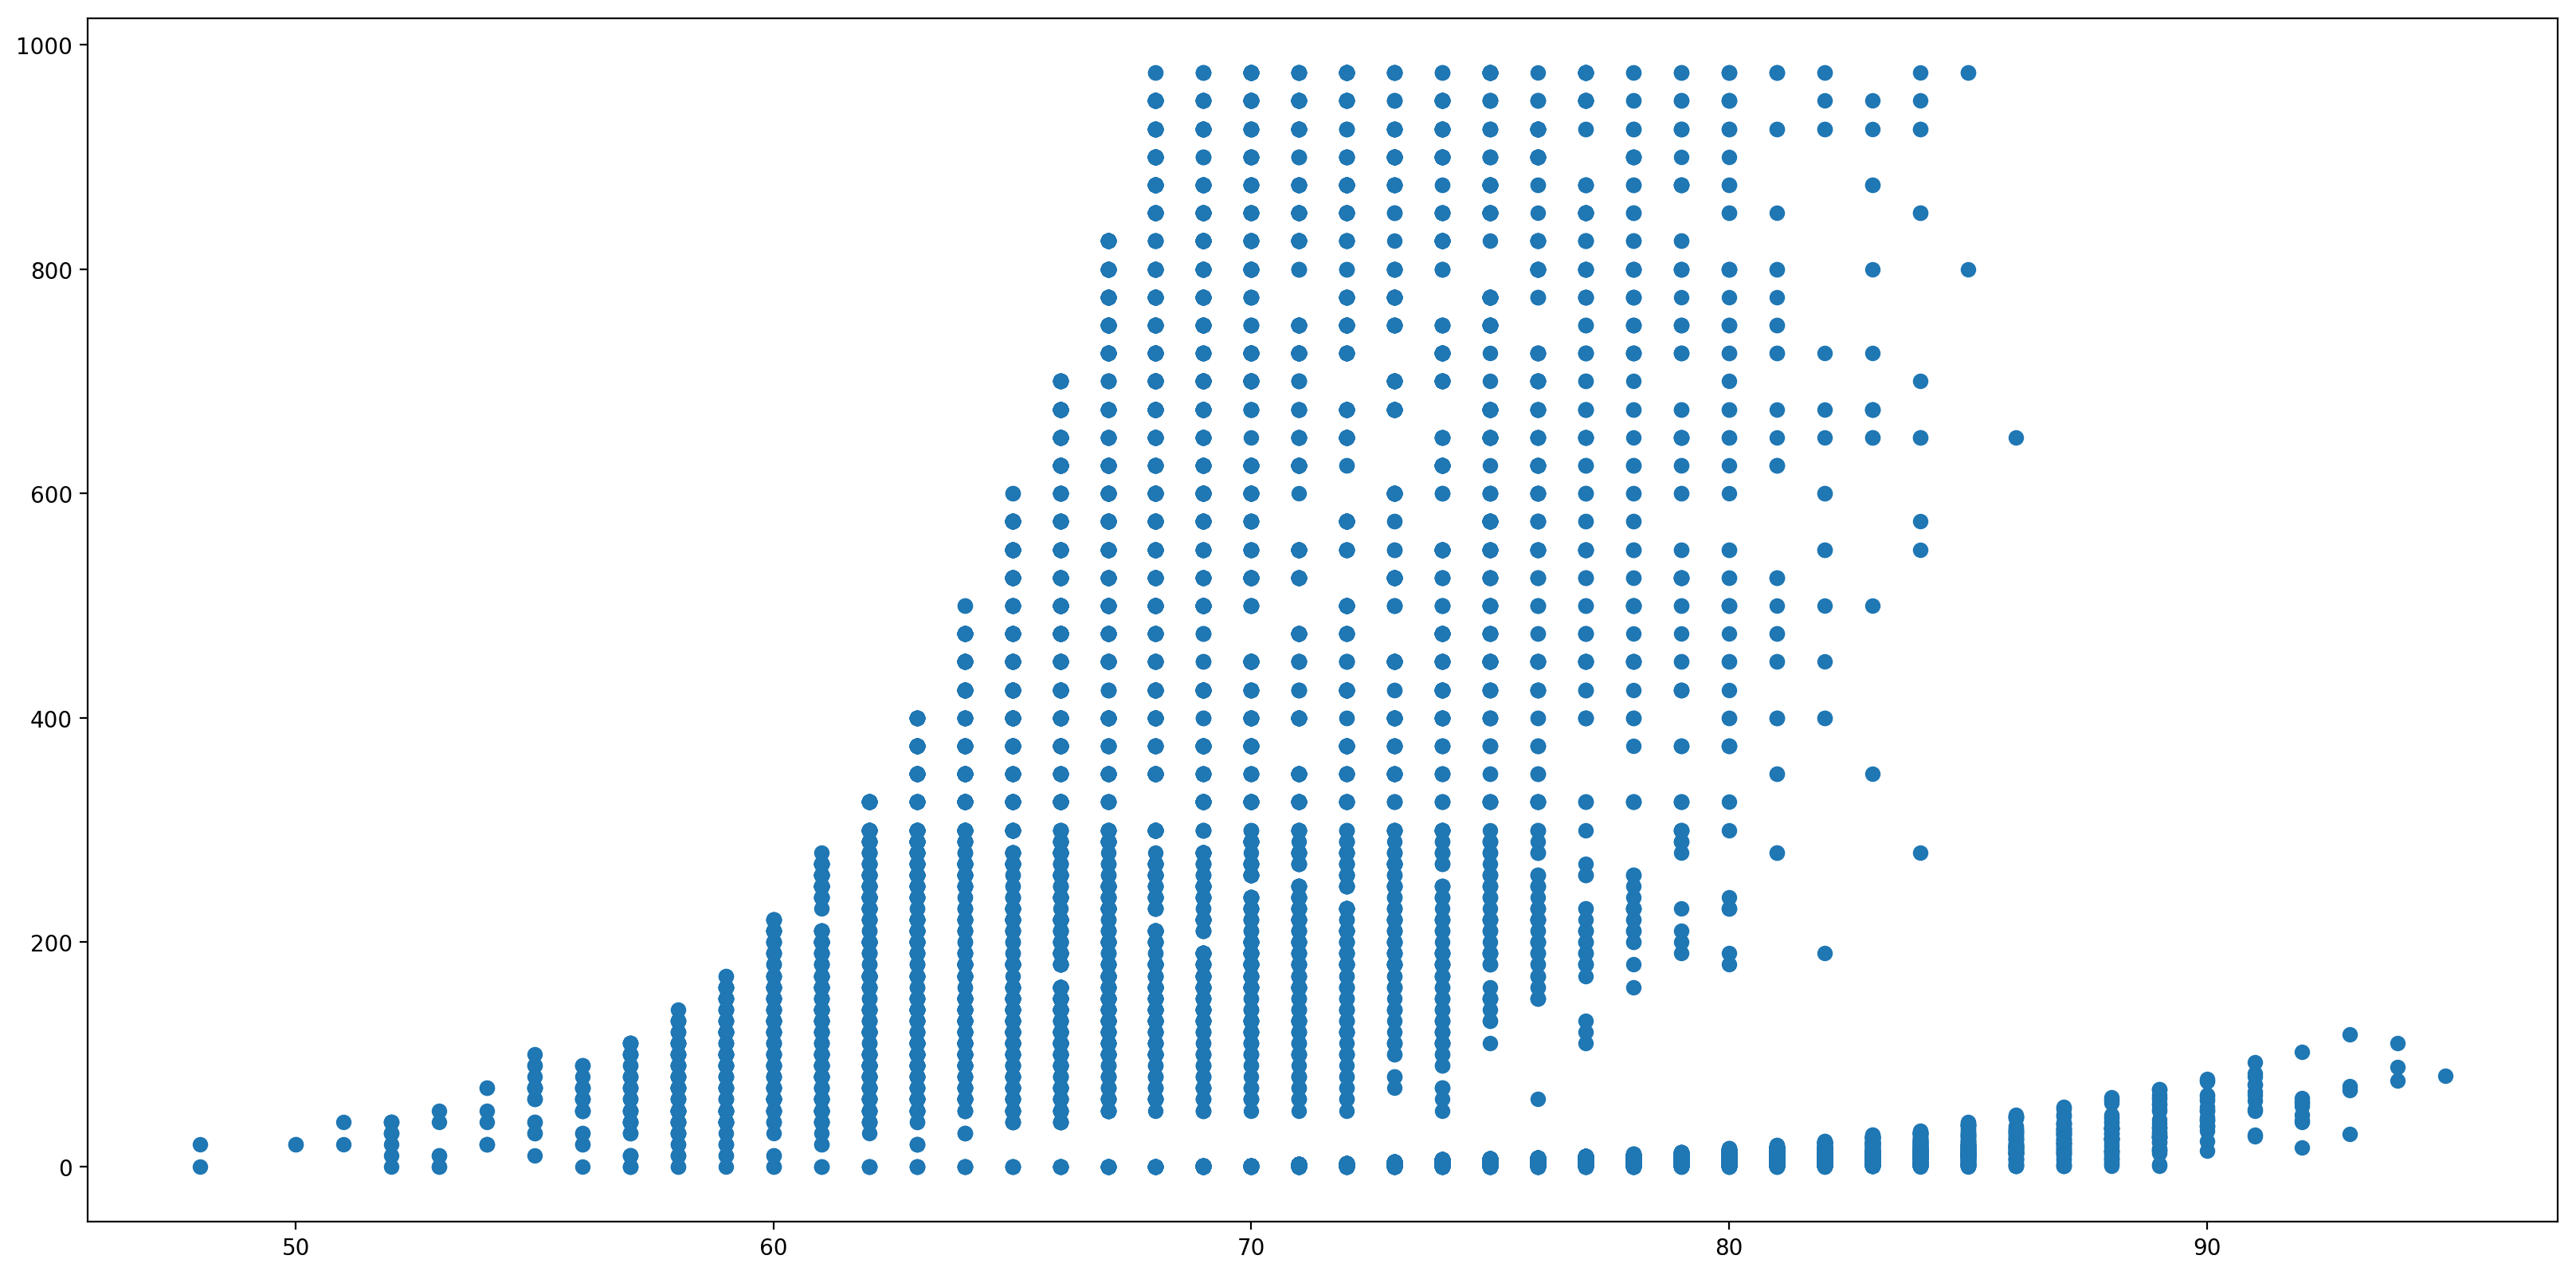

In [217]:
plt.figure(figsize=(20, 10), dpi=200)
plt.scatter( fifa1['Potential'], fifa1['ValueNumeric'])